# Lektion 5

In [1]:
from sympy import *
init_printing()
import numpy as np
import matplotlib.pyplot as plt

interaktiv

In [2]:
#%matplotlib notebook

für den Druck

In [3]:
%matplotlib inline 

## Graphen von Lösungsmengen

In [4]:
x = Symbol('x')
y = Symbol('y')

In [5]:
f1 = x**2+y**2
f2 = x - y
f1, f2

Zeichne beide Nullstellenmengen in ein Bild

In [6]:
f1n = lambdify((x,y), f1)
f2n = lambdify((x,y), f2)

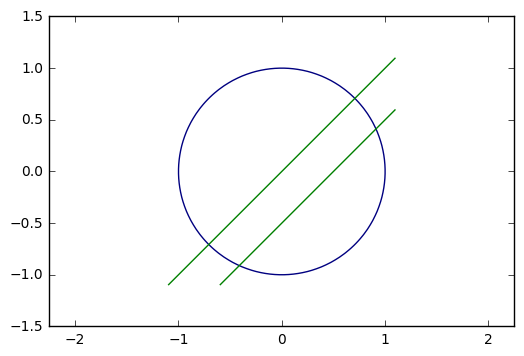

In [9]:
xn = np.linspace(-1.1, 1.1)
yn = xn
X, Y = np.meshgrid(xn, yn)
plt.contour(X, Y, f1n(X, Y), [1])
plt.contour(X, Y, f2n(X, Y), [0, .5], colors='green')
plt.axis('equal');

In [11]:
h = (x**2+y**2)**2 + 3*x**2*y - y**3
h

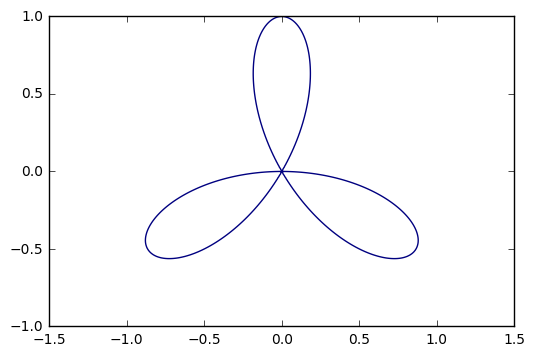

In [14]:
xn = np.linspace(-1, 1, 200)
yn = xn
hn = lambdify((x,y), h)
X, Y = np.meshgrid(xn, yn)
plt.contour(X, Y, hn(X,Y), [0])
plt.axis('equal');

## Polynomgleichungen

In [15]:
x = Symbol('x')

In [16]:
Glg = x**5 + x + 7
Glg   # keine rechte Seite bedeutet "=0"

In [17]:
Lsg = solve(Glg)
Lsg

Die Lösungen können nicht durch Wurzeln ausgedrückt werden.  Fragen Sie Dr. Klopsch.

http://www.sagemath.org kann die Galoisgruppe ausrechnen.

In [18]:
[l.n() for l in Lsg]

sympy kann damit leider nur numerisch weiterarbeiten

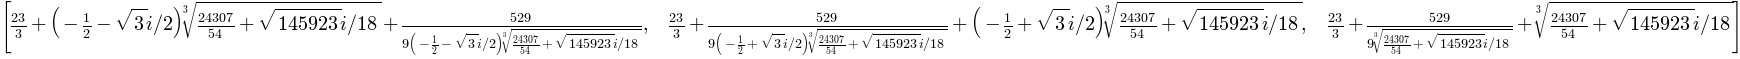

In [19]:
f = x**3 - 23*x**2 + 1
Glg = Eq(f, 0)
Lsg = solve(Glg)
Lsg

In [20]:
[l.n() for l in Lsg]

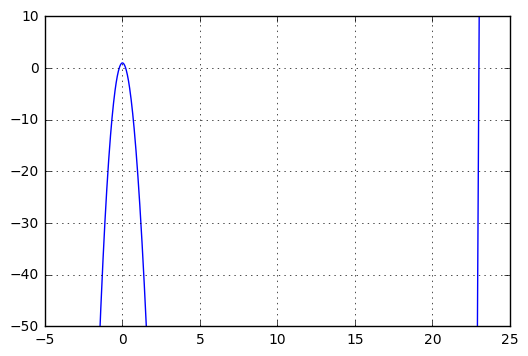

In [23]:
fn = lambdify(x, f, 'numpy')
xn = np.linspace(-5, 24, 1200)
plt.plot(xn, fn(xn))
plt.grid()
plt.axis(ymin=-50, ymax=10)

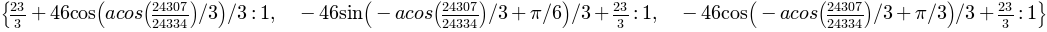

In [24]:
rlsg = roots(Glg, trig=True)
rlsg

In [25]:
print([r.n() for r in rlsg])
print([l.n() for l in Lsg])

[0.209470462659866, 22.9981093300069, -0.207579792666746]
[0.209470462659866 + 0.e-19*I, -0.207579792666746 + 0.e-22*I, 22.9981093300069 - 0.e-21*I]


In [28]:
f.subs(x, list(rlsg)[0]).expand(trig=True).trigsimp()

In [29]:
[f.subs(x, x0).expand(trig=True).trigsimp() for x0 in rlsg]

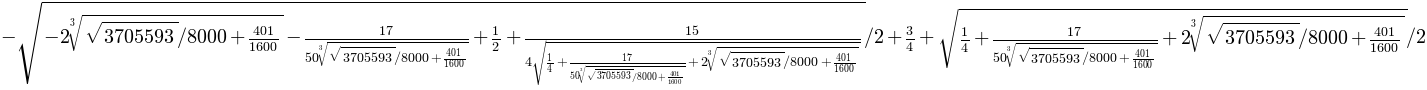

In [30]:
g = 100*(x-1)*(x**2+1)*(x-2) + 1
Lsg = solve(g)
Lsg[2]

In [31]:
Lsg[2].n()

In [32]:
solve(g, quartics=False)

## Numerische Lösung von Gleichungen

In [33]:
x = Symbol('x')

/home/braun/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in less


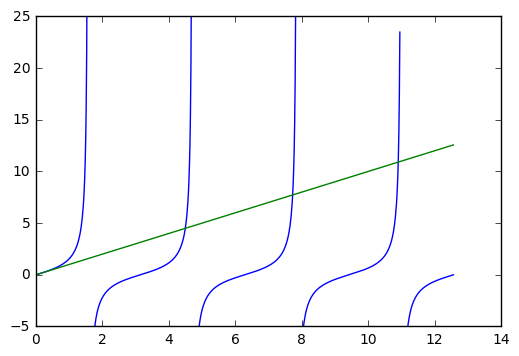

In [36]:
xn = np.linspace(0, 4*np.pi, 850)
yn = np.tan(xn)
yn[yn>35] = np.nan
yn[yn<-10] = np.nan
plt.plot(xn, yn)
plt.plot(xn, xn)
plt.axis(ymin=-5, ymax=25);

In [38]:
solve(tan(x)-x) #gibt NotImplementedError

NotImplementedError: multiple generators [x, tan(x)]
No algorithms are implemented to solve equation -x + tan(x)

In [39]:
nsolve(tan(x)-x, 4)

mpf('-0.00051084676234878935')

In [40]:
x0 = nsolve(tan(x)-x, (np.pi, 1.499*np.pi), solver='anderson')   # ridder und bisect sind auch möglich
x0

mpf('4.4934094579090642')

In [41]:
float(x0)

## Parameterabhängige Gleichungen

In [42]:
x = Symbol('x')
a = Symbol('a')

In [43]:
Glg = Eq(exp(-a*x), 3*x**a)
Glg

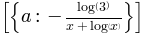

In [44]:
solve(Glg)

In [45]:
Lsg = solve(Glg, x)
Lsg

LambertW(a) ist die Lösung von $xe^x=a$.

In [46]:
solve(x*exp(x)-a, x)

In [47]:
f = Lsg[0]
f.subs(a, 1).n()

Warum kann $f$ nicht lambdifiziert werden?

In [48]:
xn = np.linspace(.01, 5)
yn = [f.subs(a, xx).n() for xx in xn]

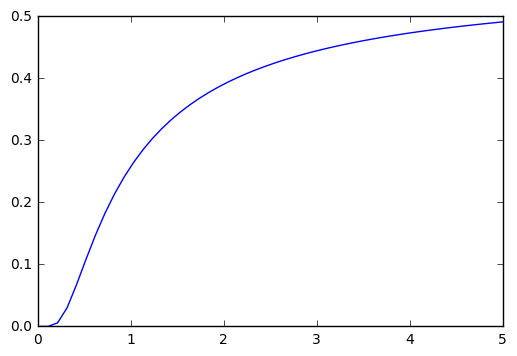

In [49]:
plt.plot(xn, yn);

Gibt es einen endlichen Grenzwert für $a\to\infty$?

In [50]:
L = Limit(f, a, oo)
L

In [51]:
L.doit()


In [52]:
LambertW(1.)

Ist die Differenz zwischen $f$ und dem Grenzwert (uneigentlich Riemann-)integriebar?

## Reihenenticklungen

In [53]:
sin(x).series(x, 0, 14)

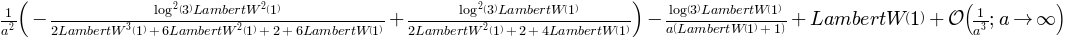

In [54]:
reihe = f.series(a, oo, 3)
reihe

Die Differenz ist asymptotisch proportional zu $-\frac1a$, also nicht integrierbar.

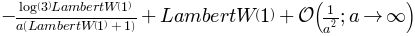

In [55]:
reihe + O(a**(-2), (a, oo))

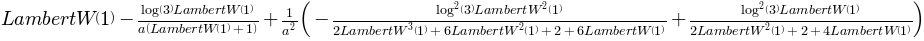

In [56]:
reihe.removeO()